In [2]:
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [4]:
olive = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/hellraiser/scikit_learn_data


In [6]:
olive.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

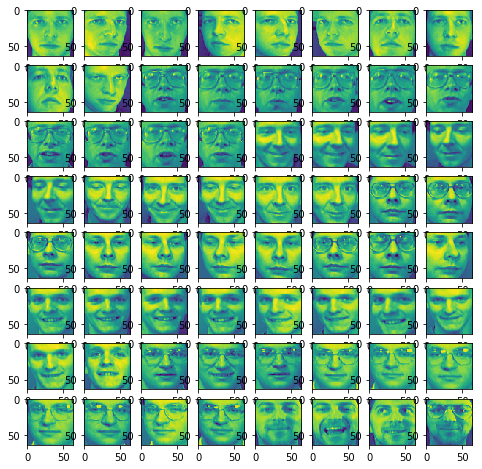

In [8]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(olive.images[i])
plt.show()

In [9]:
pca = PCA()
pca.fit(olive.data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [22]:
pca.components_.shape

(400, 4096)

In [29]:
features = 0
curr_val = 0
total = sum(pca.explained_variance_)
while curr_val/total <= 0.96:
    curr_val += pca.explained_variance_[features]
    features = features +  1
features

143

In [32]:
pca2 = PCA(n_components=features, whiten= True)
x_transformed = pca2.fit_transform(olive.data)

In [39]:
x_ori_approx = pca2.inverse_transform(x_transformed)
x_ori = x_ori_approx.reshape(400, 64, 64)

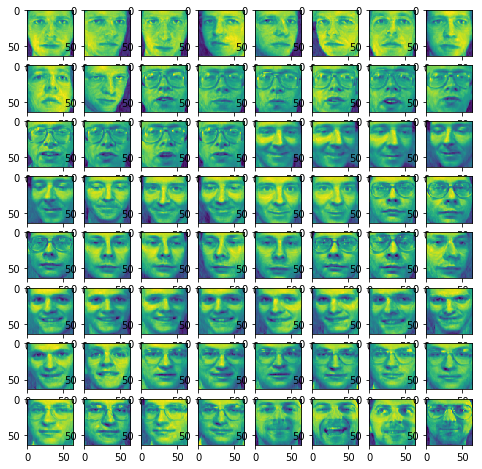

In [40]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(x_ori[i])
plt.show()

In [47]:
eigenvectors = pca2.components_
eigenvectors.shape

(143, 4096)

In [48]:
eigenfaces = eigenvectors.reshape(143, 64, 64)

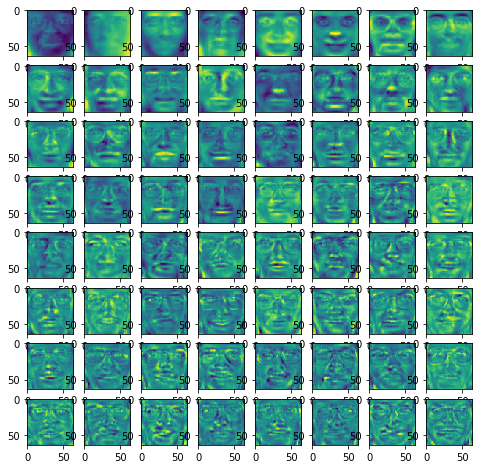

In [49]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(eigenfaces[i])
plt.show()